In [90]:
from geopi import GeoPi
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import folium
import time

geopi = GeoPi()

lat, lng = 32.043787, 118.797437

# 查询经纬度为位置所在的省市区
start_time = time.time()
ret = geopi.search_city(lat, lng)
end_time = time.time()

elapsed_time = (end_time - start_time) * 1000
print(f"Executed in {elapsed_time:.2f} ms")
print(ret)

Executed in 2.08 ms
{'province': ['江苏省', '320000'], 'city': ['南京市', '320100'], 'area': ['玄武区', '320102']}


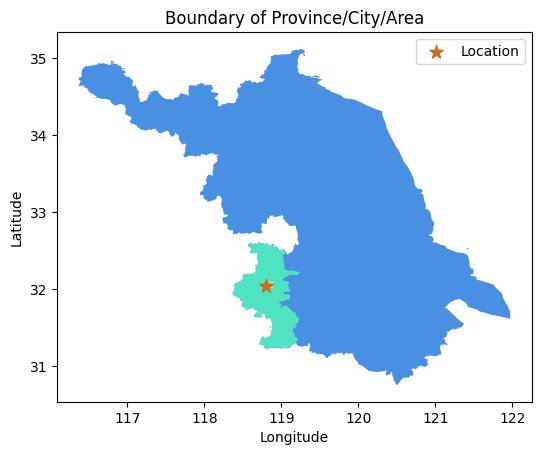

In [91]:
# 获取经纬度坐标所在区域的边界数据
province_boundary = geopi.get_boundary_data(ret['province'][1])
city_boundary = geopi.get_boundary_data(ret['city'][1])
area_boundary = geopi.get_boundary_data(ret['area'][1])

gdf = GeoDataFrame({'geometry': [province_boundary, city_boundary, area_boundary]}, index=['province', 'city', 'area'])
ax = gdf.plot(color=['#4A90E2', '#50E3C2', '#B8E986'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boundary of Province/City/Area')

# 在地图上绘制经纬度位置点
plt.scatter(lng, lat, color='#D2691E', marker='*', s=100, zorder=10, label='Location')
ax.legend()

In [92]:
# 查询经纬度位置附近的POI信息
topk = 20
start_time = time.time()
ret = geopi.search_nearest_poi(lat, lng, topk=topk)
end_time = time.time()

elapsed_time = (end_time - start_time) * 1000
print(f"Executed in {elapsed_time:.2f} ms")
ret.head(topk)

Executed in 400.67 ms


,osm_id,code,fclass,name,wgs84,gcj,dist
1207,321096460,1500,building,大堂,POINT (118.79238 32.04566),POINT (118.79757 32.04359),24.748951
1928,62353727,2204,park,总统府,POINT (118.79232 32.04639),POINT (118.79751 32.04432),59.795128
1929,62353727,2721,attraction,总统府,POINT (118.79232 32.04639),POINT (118.79751 32.04432),59.795128
1930,62353727,7202,park,总统府,POINT (118.79232 32.04639),POINT (118.79751 32.04432),59.795128
1209,321096462,1500,building,国民政府主计处,POINT (118.79192 32.04535),POINT (118.79711 32.04328),63.853813
1807,5676754221,2722,museum,总统府,POINT (118.79235 32.04509),POINT (118.79754 32.04302),85.323791
19,1015404006,1500,building,行政院南楼,POINT (118.79330 32.04622),POINT (118.79848 32.04415),106.851430
1206,321096452,1500,building,总统府文书局办公楼子超楼,POINT (118.79242 32.04684),POINT (118.79761 32.04477),110.787036
1208,321096461,1500,building,总统府门楼,POINT (118.79235 32.04484),POINT (118.79754 32.04278),112.224481
1938,625069539,1500,building,孙中山临时大总统办公室,POINT (118.79107 32.04624),POINT (118.79626 32.04418),119.215066


In [93]:
# 统计ret['fclass']中的类别数量字典
poi_classes = ret['fclass'].value_counts().to_dict()
poi_classes

{'building': 10,
 'park': 2,
 'museum': 2,
 'cafe': 2,
 'attraction': 1,
 'restaurant': 1,
 'retail': 1,
 'hotel': 1}

In [94]:
# 绘制地图，将POI在地图上显示
map = folium.Map(location=[lat, lng], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德-中英文对照',
           zoom_start=17)
folium.Marker(location=[lat, lng], icon=folium.Icon(color='red', icon="home")).add_to(map)

for index, row in ret.iterrows():
    fclass = row['fclass']
    name = row['name']
    pt = row['gcj']
    folium.Marker(location=[pt.y, pt.x], icon=folium.Icon(color='blue'), tooltip=name).add_to(map)
map